Лабораторная работа № 8  Классификация (линейный дискриминантный анализ, метод опорных векторов)

Выполнил: Мартынов В.А., ДПИ15

In [209]:
# Модуль импорта

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.svm import NuSVC 
from sklearn.svm import LinearSVC


1. Загрузка данных:

In [210]:
# Загрузка данных
# Согласно описанию датасета, метками данных является столбец "Class".

column_names = [
    'Class', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash',
    'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
    'Proanthocyanins', 'Color_Intensity', 'Hue',
    'OD280_OD315', 'Proline'
]

data = pd.read_csv('wine.data', header=None, names=column_names)

data

,Class,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [211]:
# Создадим новые переменные, labels будет содержать столбец с метками данных, Х будет содержать сами данные.
# Использование LabelEncoder не требуется для кодирования меток, так как они уже находятся в числовом представлении.

y = data['Class']
print(y)

X = data.drop(['Class'], axis=1)
X

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 178, dtype: int64


,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [212]:
# Разделение данных на две выборки 50/50

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

2. Линейный дискриминантный анализ

In [213]:
# Создание и обучение модели LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = lda.predict(X_test)

# Вычисление общего количества точек и количества неправильно маркированных точек
total_points = len(y_test)
incorrect_points = np.sum(y_pred != y_test)

# Вычисление точности классификации
accuracy = lda.score(X_test, y_test)

# Вывод результатов
print(f"Общее количество точек: {total_points}")
print(f"Количество неправильно маркированных точек: {incorrect_points}")
print(f"Точность классификации: {accuracy:.2f}")

Общее количество точек: 89
Количество неправильно маркированных точек: 5
Точность классификации: 0.94


In [214]:
# Атрибуты метода Linear Discriminant Analysis (LDA)
# 
#     solver:
#         Определяет алгоритм, используемый для решения задачи LDA. Возможные значения:
#             'svd': Использует сингулярное разложение (SVD). Это значение по умолчанию.
#             'lsqr': Использует метод наименьших квадратов.
#             'eigen': Использует метод собственных значений.
#         Влияние: Разные решатели могут иметь разные характеристики производительности и точности в зависимости от данных.
#     shrinkage:
#         Используется только с solver='lsqr'. Это позволяет применять регуляризацию, чтобы уменьшить переобучение.
#         Влияние: Может улучшить обобщающую способность модели, особенно при малом количестве наблюдений по сравнению с количеством признаков.
#     priors:
#         Позволяет задать априорные вероятности классов. Это может быть полезно, если классы несбалансированы.
#         Влияние: Изменение априорных вероятностей может повлиять на предсказания модели, особенно в случае несбалансированных классов.
#     n_components:
#         Определяет количество компонент, которые будут использоваться для проекции данных. Значение должно быть меньше или равно min(n_classes - 1, n_features).
#         Влияние: Уменьшение числа компонент может привести к потере информации, но также может помочь в уменьшении размерности и улучшении вычислительной эффективности.
#     store_covariance:
#         Если установлено в True, модель будет хранить матрицу ковариации классов.
#         Влияние: Это может быть полезно для анализа и интерпретации модели, но увеличивает потребление памяти.
#     tol:
#         Параметр, определяющий допустимый уровень точности для вычислений. Используется для контроля сходимости алгоритма.
#         Влияние: Установка слишком низкого значения может привести к увеличению времени вычислений, в то время как слишком высокое значение может привести к потере точности.
#     class_weight:
#         Позволяет задать веса для классов, что может быть полезно в случае несбалансированных данных.
#         Влияние: Изменение весов классов может помочь модели лучше справляться с несбалансированными данными, улучшая точность для меньшинства классов.

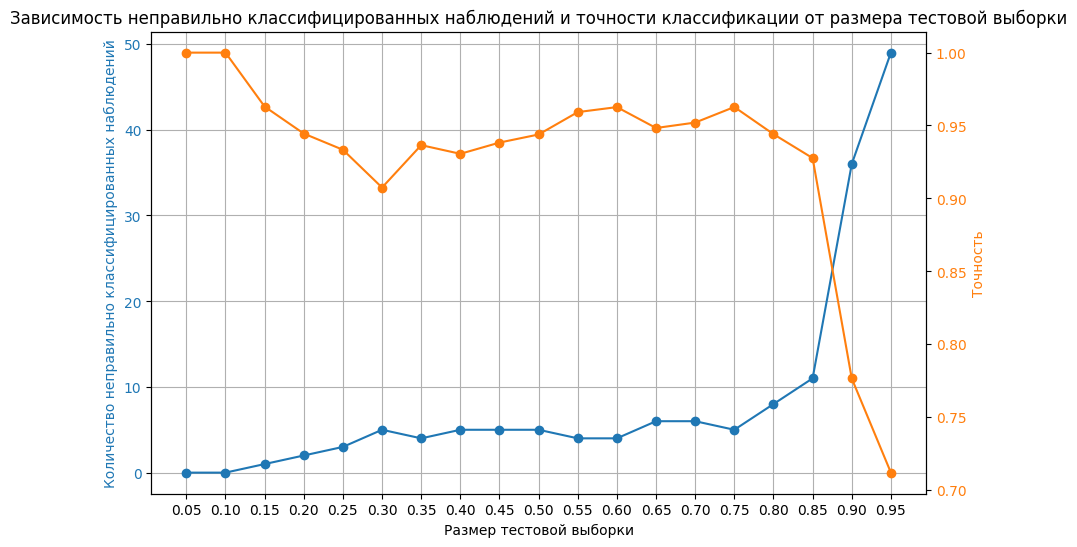

In [215]:
# Параметры для тестирования
test_sizes = np.arange(0.05, 1.0, 0.05)
incorrect_points = []
accuracies = []

# Цикл по различным размерам тестовой выборки
for test_size in test_sizes:
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=10)
    
    # Создание и обучение модели LDA
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    
    # Прогнозирование на тестовой выборке
    y_pred = lda.predict(X_test)
    
    # Вычисление количества неправильно классифицированных точек и точности
    incorrect_points.append(np.sum(y_pred != y_test))
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Построение графиков
plt.figure(figsize=(10, 6))

# Создание оси для неправильно классифицированных наблюдений
ax1 = plt.gca()
ax1.set_xlabel('Размер тестовой выборки')
ax1.set_ylabel('Количество неправильно классифицированных наблюдений', color='tab:blue')
ax1.plot(test_sizes, incorrect_points, marker='o', color='tab:blue', label='Неправильно классифицированные')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(test_sizes)

# Создание второй оси для точности классификации
ax2 = ax1.twinx()  
ax2.set_ylabel('Точность', color='tab:orange')  
ax2.plot(test_sizes, accuracies, marker='o', color='tab:orange', label='Точность')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Добавление заголовка и сетки
plt.title('Зависимость неправильно классифицированных наблюдений и точности классификации от размера тестовой выборки')
ax1.grid()

# Показать график
plt.show()

In [216]:
# На полученном графике видим две кривых, синяя показывает количество неправильно классифицированных наблюдений, оранжевая общую точность классификации. 
# При размере тестовой выборки до 30% наблюдаются нестабильные результаты классификации, это говорит о переобученности модели, так как обучающих данных в этом случае слишком много.
# Начиная с 30% и заканчивая 80% модель показала хороший результат классификации. Точность остается высокой, несмотря на колебания, количество неправильных классификаций также остается фиксированным
# От 85% наблюдаем резкую смену тенденции графика, тестовая выборка в этом случае слишком велика, что приводит к недообученности модели, что хорошо наблюдается в обратно пропорциональных изменениях двух параметров.

Accuracy: 0.711764705882353
Confusion Matrix:
[[34  4 19]
 [ 1 61  5]
 [ 1 19 26]]
Результаты классификации:
Класс 2: 84 экземпляров
Класс 1: 36 экземпляров
Класс 3: 50 экземпляров


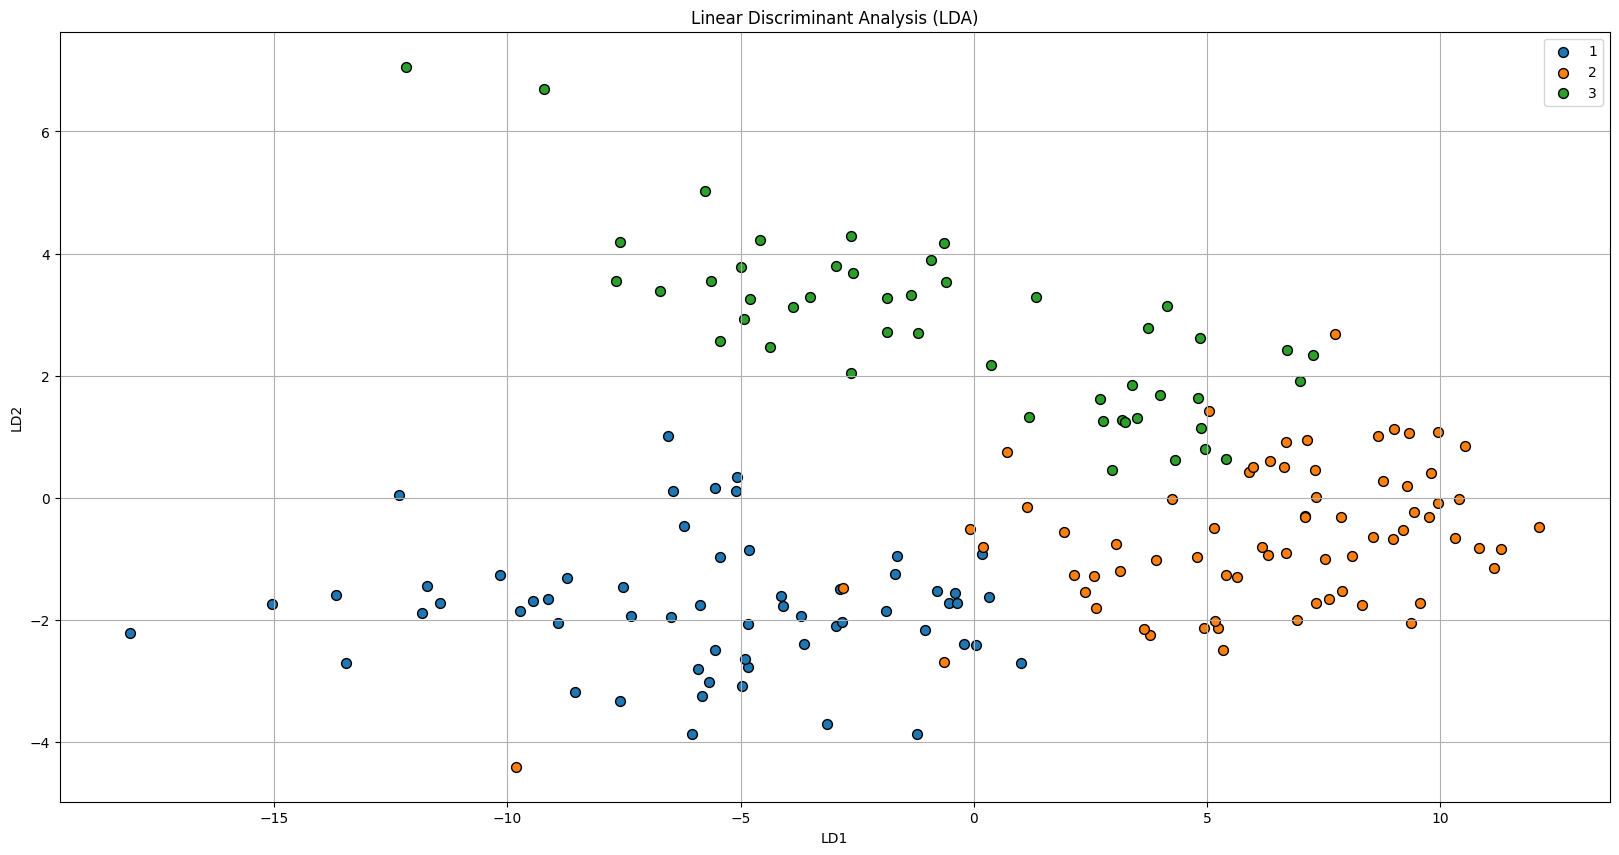

In [217]:
# Обучение модели LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
labels = ['1', '2', '3']

# Прогнозирование классов на тестовой выборке
y_pred = lda.predict(X_test)

# Подсчет количества экземпляров для каждого класса
class_counts = Counter(y_pred)


# Оценка модели (Добавим данный фрагмент для сравнения результата с дальнейшими шагами)
accuracy_def = accuracy_score(y_test, y_pred)
conf_matrix_def = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy_def}')
print('Confusion Matrix:')
print(conf_matrix_def)

print("Результаты классификации:")
for class_label, count in class_counts.items():
    print(f"Класс {class_label}: {count} экземпляров")

# Преобразование данных
X_lda = lda.transform(X)

# Визуализация результата
plt.figure(figsize=(20, 10))
for i, target_name in zip([1, 2, 3], labels):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=target_name,  edgecolor='k', s=50)

plt.title('Linear Discriminant Analysis (LDA)')
plt.xlabel('LD1')  # Первая линейная дискриминантная функция
plt.ylabel('LD2')  # Вторая линейная дискриминантная функция
plt.legend()
plt.grid()
plt.show()

In [218]:
# Функция transform в классе LinearDiscriminantAnalysis (LDA) из библиотеки scikit-learn выполняет проекцию данных в пространство меньшей размерности, основанное на линейных дискриминантных функциях, которые были вычислены во время обучения модели.# 

# Основные действия функции transform:
#     Обучение модели: 
#         Перед вызовом transform необходимо обучить модель LDA с помощью метода fit. В процессе обучения LDA вычисляет параметры, необходимые для проекции данных, такие как средние значения классов и матрицы ковариации.
#     Проекция данных: 
#         При вызове transform, функция использует параметры, полученные на этапе обучения, для проекции входных данных (например, тестовых данных) в новое пространство. Это новое пространство имеет размерность, равную числу классов минус один (то есть n_classes - 1).
#     Линейные дискриминантные функции: 
#         Проекция осуществляется с использованием линейных комбинаций признаков, которые максимизируют разделение между классами. Это достигается путем нахождения направлений (дискриминантных функций), по которым классы наиболее разделены.
#     Возврат преобразованных данных: 
#         Функция возвращает массив, содержащий проекции входных данных в новое пространство. Эти проекции могут быть использованы для дальнейшего анализа, визуализации или классификации.

Ошибка линейной алгебры для test_size=0.9500000000000001: The leading minor of order 6 of B is not positive definite. The factorization of B could not be completed and no eigenvalues or eigenvectors were computed.


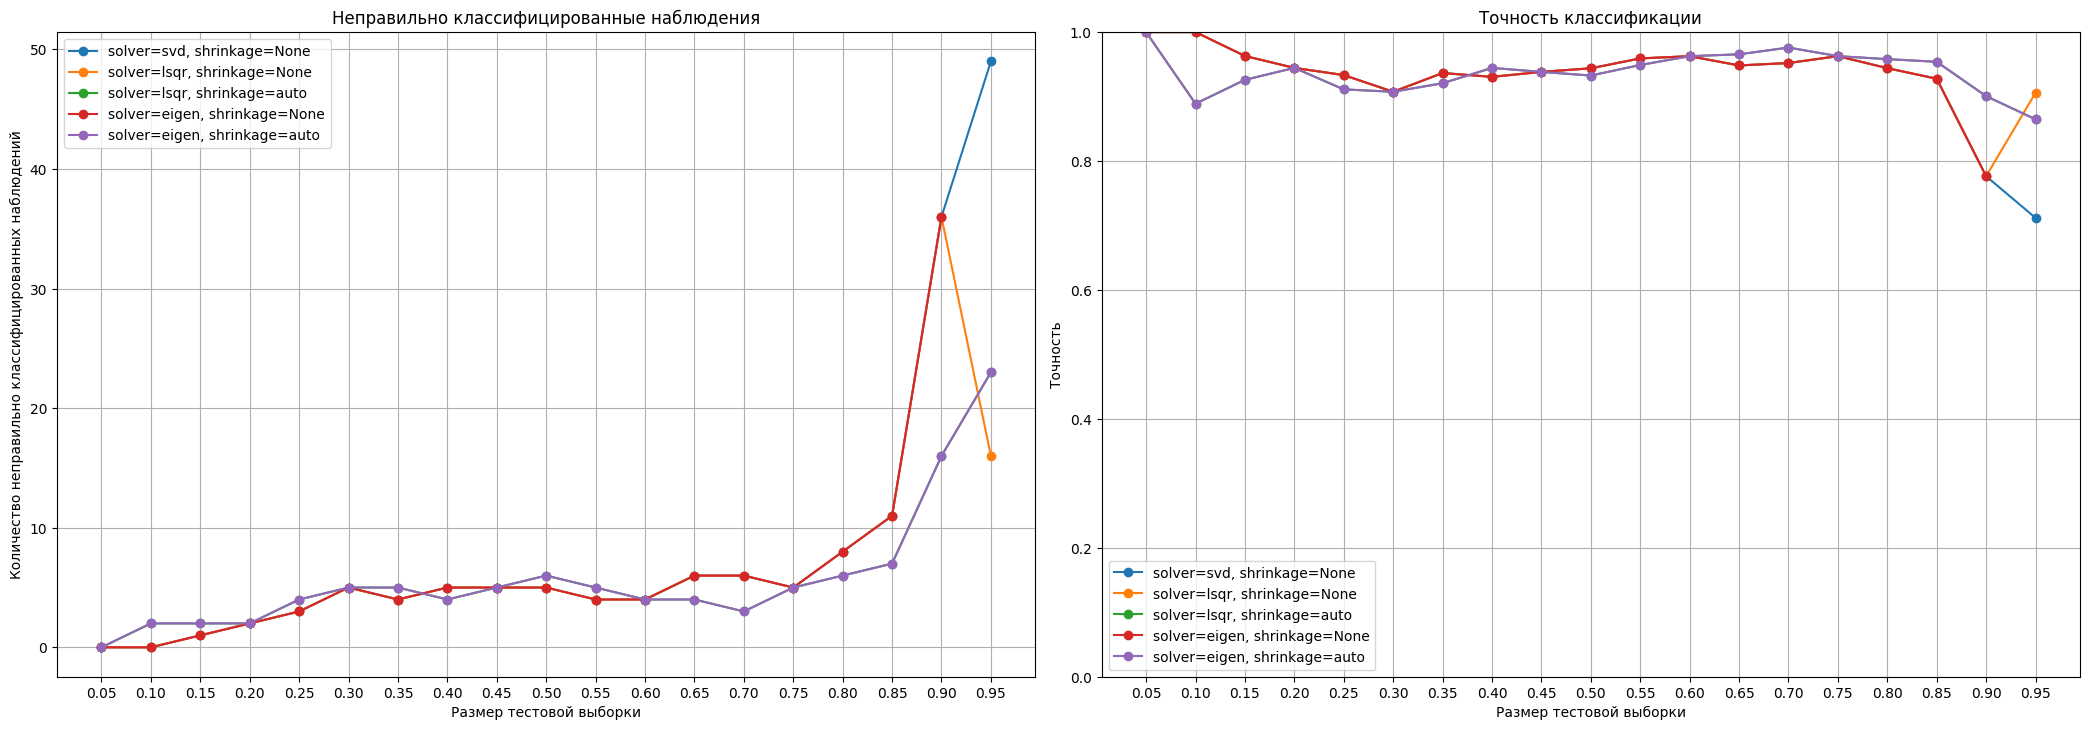

In [219]:
# Параметры для тестирования
test_sizes = np.arange(0.05, 1.0, 0.05)
solvers = ['svd', 'lsqr', 'eigen']
shrinkages = [None, 'auto']

# Подготовка для хранения результатов
results = {}

# Цикл по различным параметрам
for solver in solvers:
    for shrinkage in shrinkages:
        # Пропускаем комбинацию, если shrinkage не поддерживается
        if solver == 'svd' and shrinkage is not None:
            continue
        
        incorrect_points = []
        accuracies = []
        
        for test_size in test_sizes:
            # Разделение данных на обучающую и тестовую выборки
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=10)
            
            # Проверка на наличие NaN или бесконечных значений
            if np.any(np.isnan(X_train)) or np.any(np.isinf(X_train)):
                print(f"Неправильные данные в обучающей выборке для test_size={test_size}")
                continue
            
            try:
                # Создание и обучение модели LDA
                lda = LinearDiscriminantAnalysis(solver=solver, shrinkage=shrinkage)
                lda.fit(X_train, y_train)
                
                # Прогнозирование на тестовой выборке
                y_pred = lda.predict(X_test)
                
                # Вычисление количества неправильно классифицированных точек и точности
                incorrect_points.append(np.sum(y_pred != y_test))
                accuracy = accuracy_score(y_test, y_pred)
                accuracies.append(accuracy)
            except np.linalg.LinAlgError as e:
                print(f"Ошибка линейной алгебры для test_size={test_size}: {e}")
                incorrect_points.append(np.nan)  # Заполняем NaN для дальнейшего анализа
                accuracies.append(np.nan)  # Заполняем NaN для дальнейшего анализа
        
        # Сохранение результатов
        results[(solver, shrinkage)] = (incorrect_points, accuracies)

# Построение графиков
plt.figure(figsize=(21, 14))

# Графики для неправильно классифицированных наблюдений
plt.subplot(2, 2, 1)
for (solver, shrinkage), (incorrect_points, _) in results.items():
    plt.plot(test_sizes, incorrect_points, marker='o', label=f'solver={solver}, shrinkage={shrinkage}')
plt.title('Неправильно классифицированные наблюдения')
plt.xlabel('Размер тестовой выборки')
plt.ylabel('Количество неправильно классифицированных наблюдений')
plt.xticks(test_sizes)
plt.legend()
plt.grid()

# Графики для точности классификации
plt.subplot(2, 2, 2)
for (solver, shrinkage), (_, accuracies) in results.items():
    plt.plot(test_sizes, accuracies, marker='o', label=f'solver={solver}, shrinkage={shrinkage}')
plt.title('Точность классификации')
plt.xlabel('Размер тестовой выборки')
plt.ylabel('Точность')
plt.xticks(test_sizes)
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


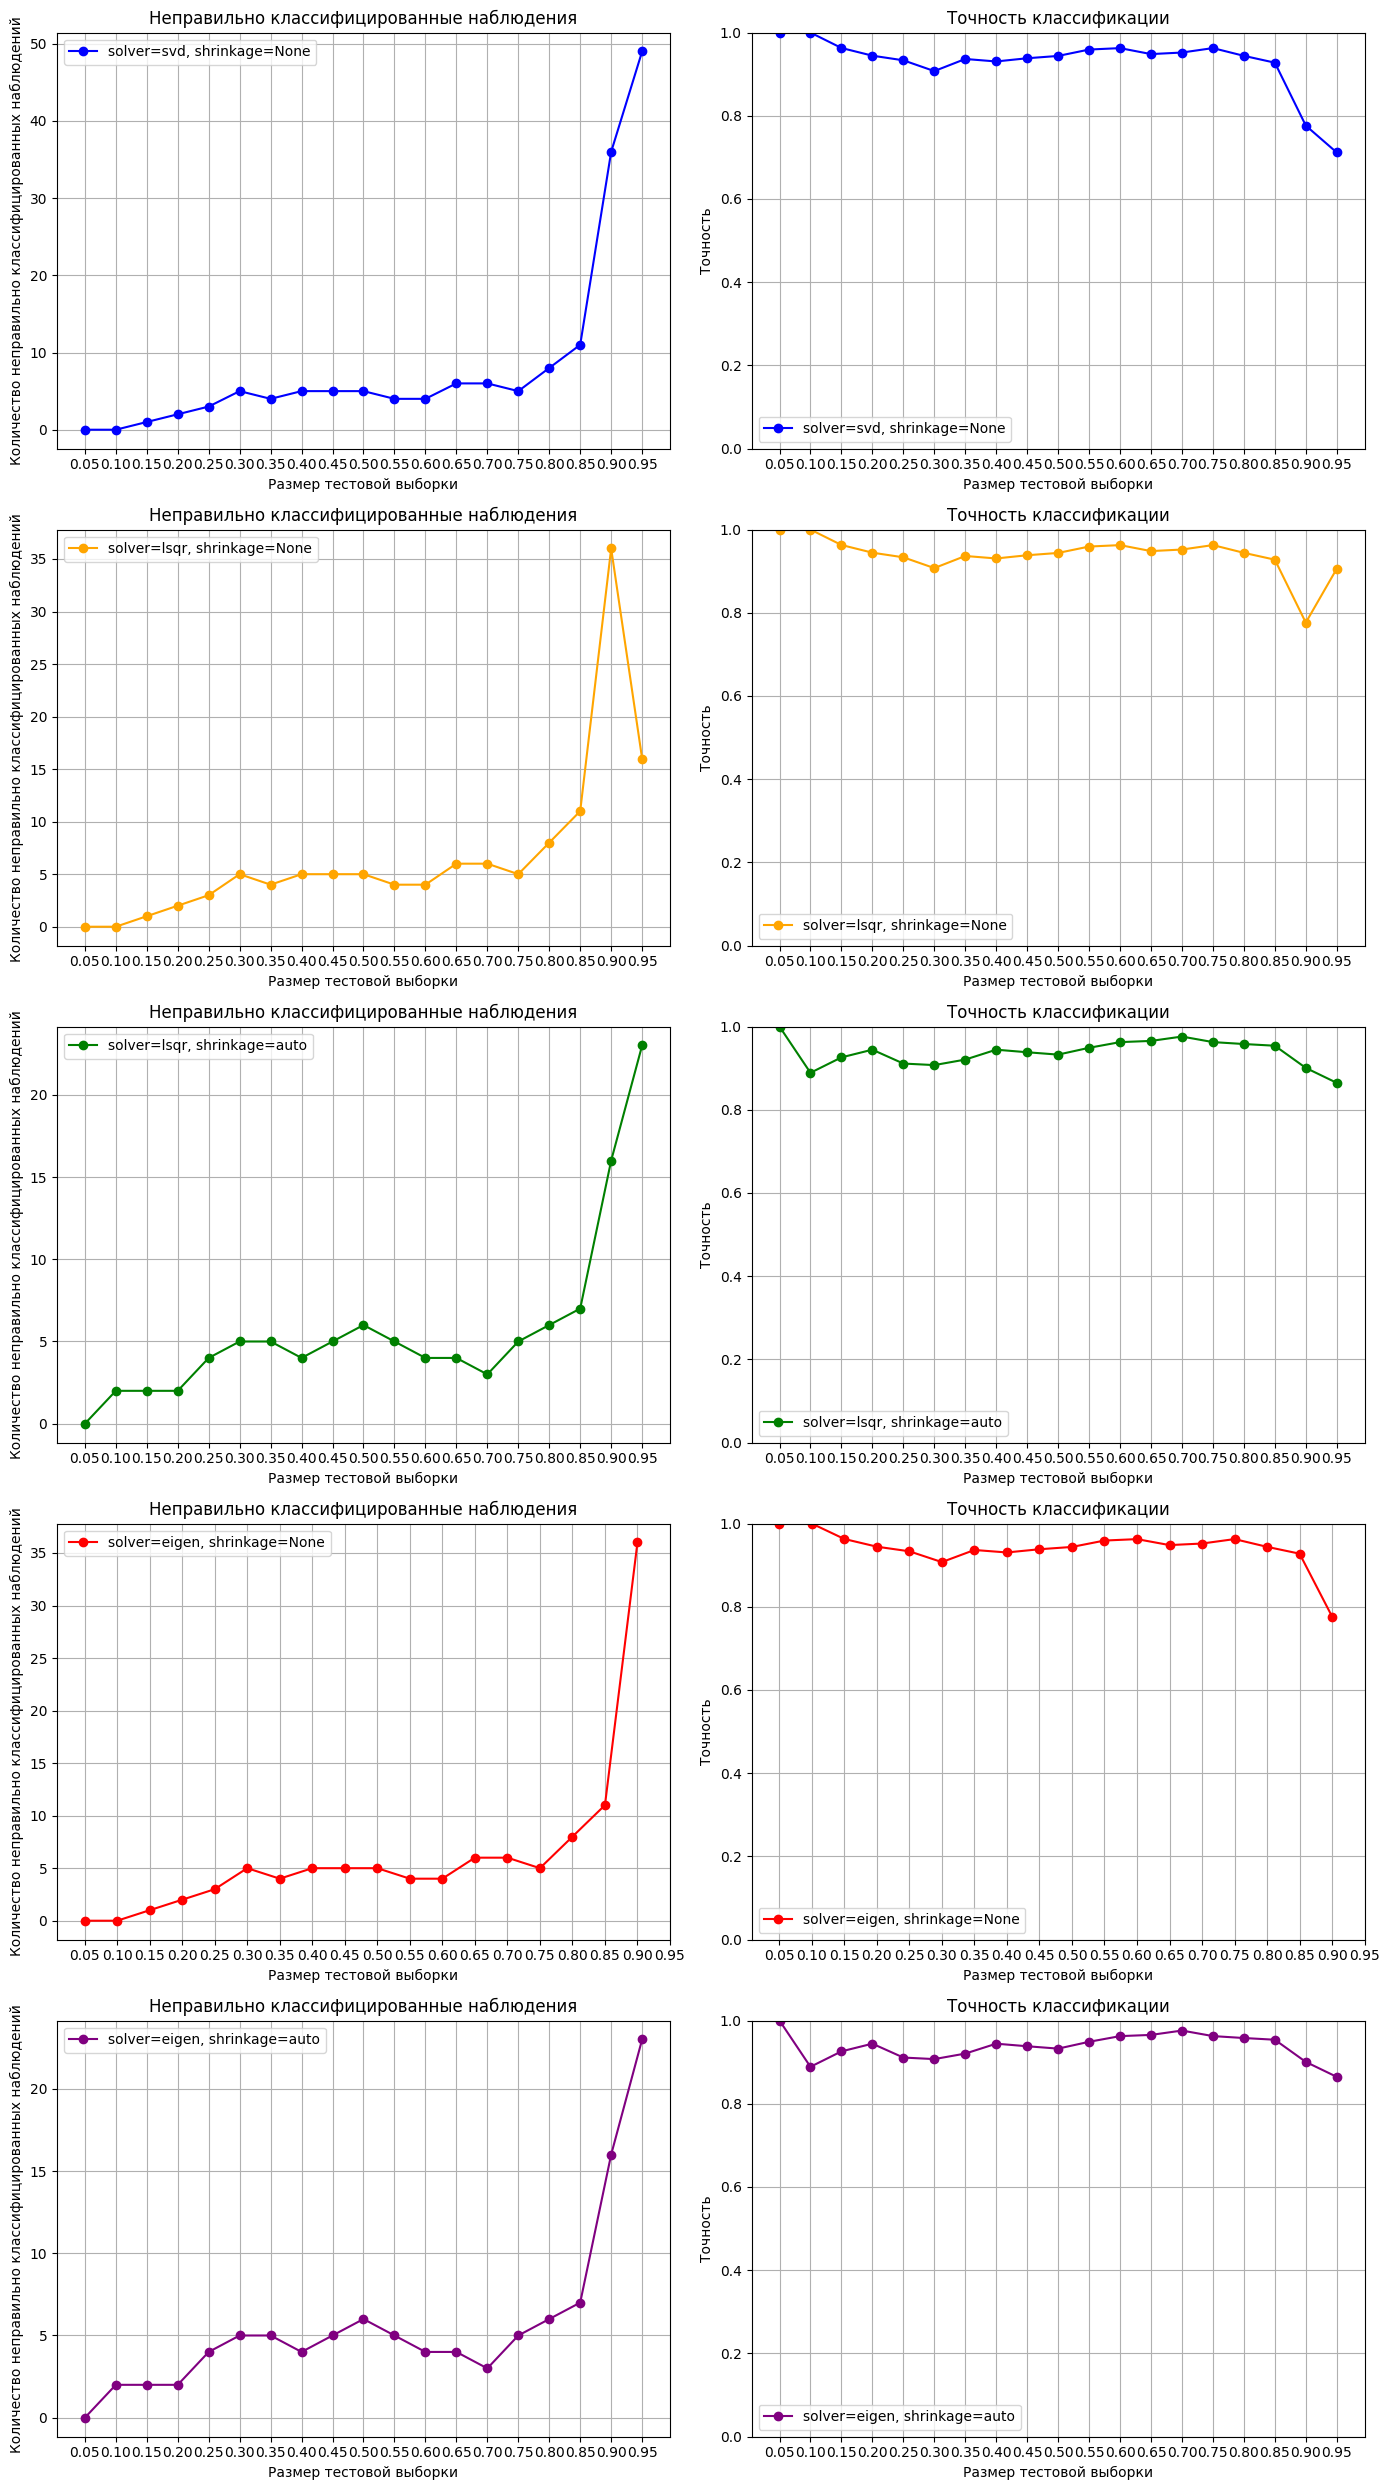

In [220]:
# Для более наглядного вида выведем графики отдельно друг от друга, так как на графиках выше обнаружились наложения


colors = ['b', 'orange', 'g', 'r', 'purple']
color_index = 0

# Построение графиков
num_plots = len(results)
plt.figure(figsize=(14, 5 * num_plots))

# Графики для неправильно классифицированных наблюдений и точности классификации
for i, ((solver, shrinkage), (incorrect_points, accuracies)) in enumerate(results.items()):
    # Выбор цвета для текущей кривой
    color = colors[color_index % len(colors)]
    color_index += 1

    # График неправильно классифицированных наблюдений
    plt.subplot(num_plots, 2, 2 * i + 1)
    plt.plot(test_sizes, incorrect_points, marker='o', color=color, label=f'solver={solver}, shrinkage={shrinkage}')
    plt.title('Неправильно классифицированные наблюдения')
    plt.xlabel('Размер тестовой выборки')
    plt.ylabel('Количество неправильно классифицированных наблюдений')
    plt.xticks(test_sizes)
    plt.legend()
    plt.grid()

    # График точности классификации
    plt.subplot(num_plots, 2, 2 * i + 2)
    plt.plot(test_sizes, accuracies, marker='o', color=color, label=f'solver={solver}, shrinkage={shrinkage}')
    plt.title('Точность классификации')
    plt.xlabel('Размер тестовой выборки')
    plt.ylabel('Точность')
    plt.xticks(test_sizes)
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


In [221]:
# Исходя из полученных выше графиков можно сделать вывод, что метод, несмотря на разные параметры, показывает достаточно высокую точность на всём рабочем участке, практически везде больше 85%.
# Во всех случаях также заметно небольшое изменение графиков количества неправильных классификаций, на рабочем участке данный показатель редко превышает 6%.
# В конечном итоге самая явная разница образовалась в участках, где размер тестовой выборке соответствует низкой обученности модели.

Accuracy: 0.7235294117647059
Confusion Matrix:
[[36  3 18]
 [ 1 61  5]
 [ 1 19 26]]
Default Accuracy: 0.711764705882353
Default Confusion Matrix:
[[34  4 19]
 [ 1 61  5]
 [ 1 19 26]]


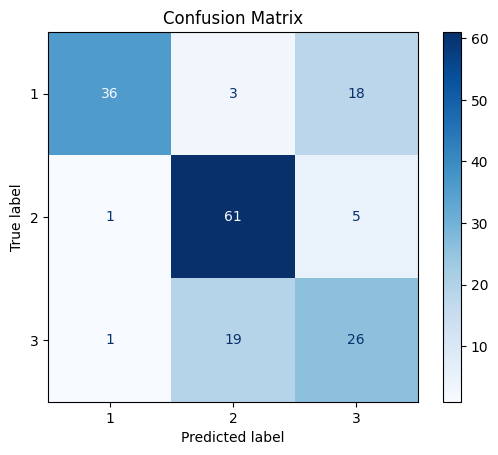

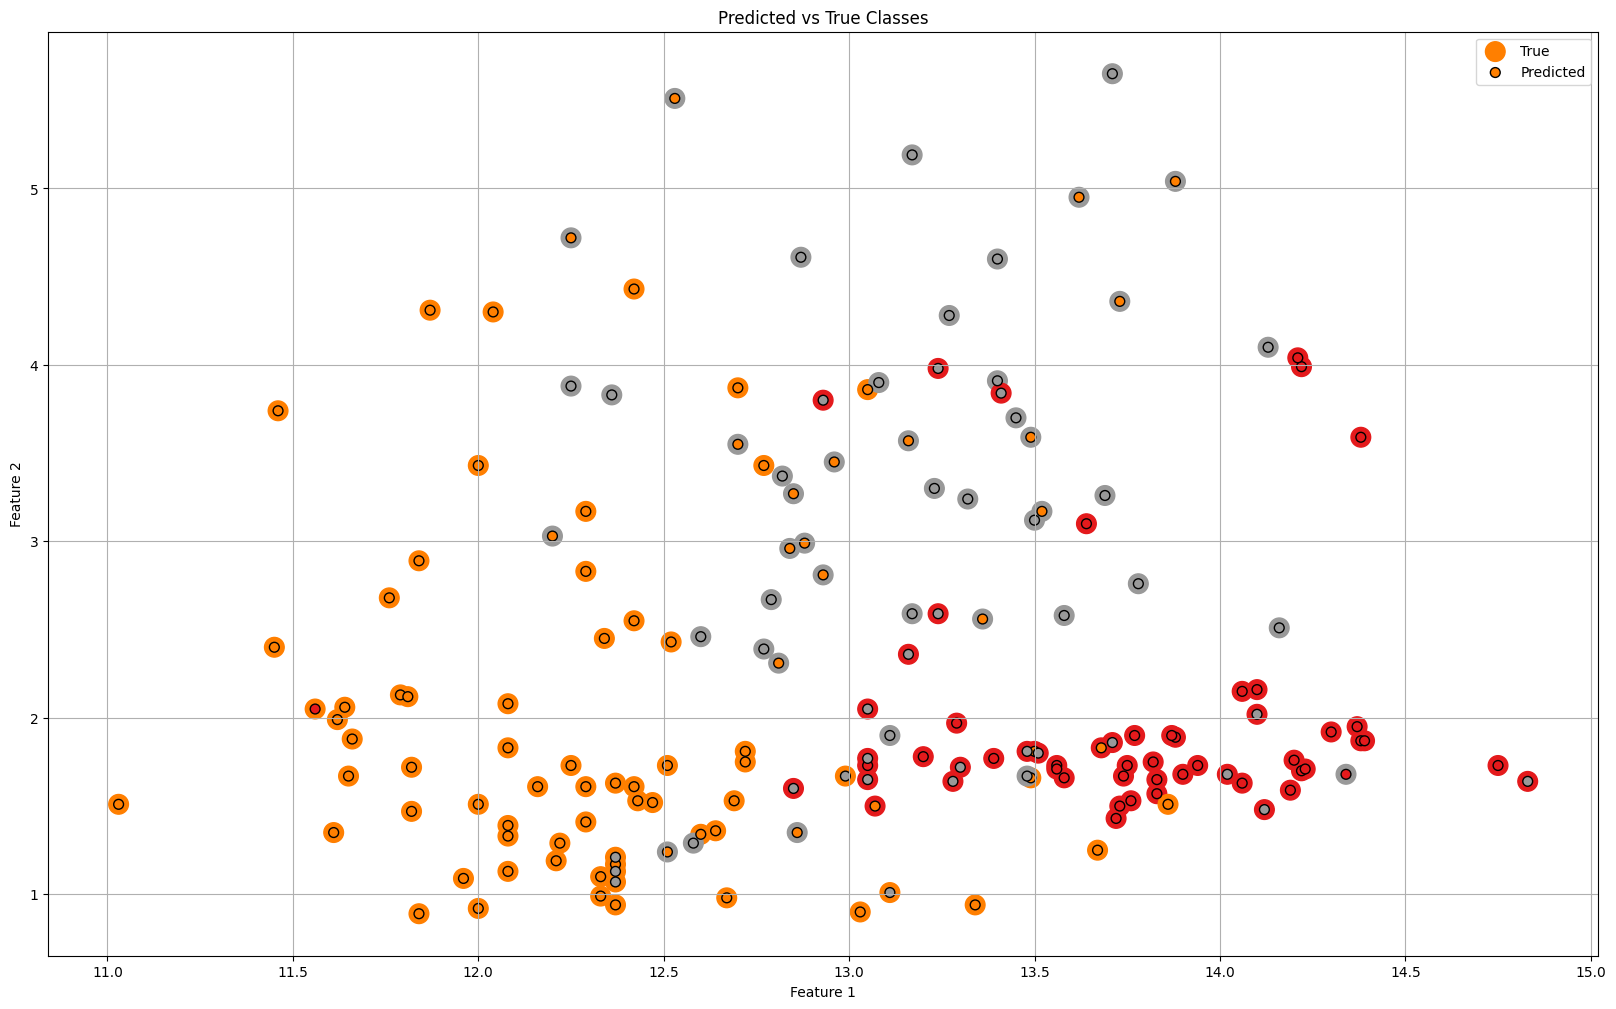

In [222]:
# Задание априорных вероятностей
priors = [0.6, 0.2, 0.2]

# Создание и обучение модели LDA с заданными априорными вероятностями
lda = LinearDiscriminantAnalysis(priors=priors)
lda.fit(X_train, y_train)

# Предсказание классов для тестовой выборки
y_pred = lda.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

print(f'Default Accuracy: {accuracy_def}')
print('Default Confusion Matrix:')
print(conf_matrix_def)

# Визуализация матрицы ошибок
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=lda.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Визуализация предсказанных классов
plt.figure(figsize=(20, 12))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap='Set1', marker='o', label='True', s=200)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='Set1', marker='o', label='Predicted', edgecolor='k', s=50)
plt.title('Predicted vs True Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

In [223]:
# Для лучшего сравнения выше были выведены результаты классификации на разных параметрах. При наличии априорных вероятностей получаем точность, которая выше примерно на 1% относительно классификации по умолчанию. 
# По матрице ошибок наблюдаем, что изменилось положение всего лишь одного экземпляра.

3. Метод опорных векторов

In [224]:
# Создание и обучение модели SVC
model = SVC()
model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Общее количество точек
total_points_svc = len(y_test)

# Количество неправильно маркированных точек
misclassified_points_svc = np.sum(y_pred != y_test)

# Вычисление точности классификации
accuracy_svc = model.score(X_test, y_test)

# Вывод результатов
print(f"Общее количество точек: {total_points_svc}")
print(f"Количество неправильно маркированных точек: {misclassified_points_svc}")
print(f"Точность классификации: {accuracy_svc:.2f}")

# Вывод информации о поддерживающих векторах
print("Поддерживающие векторы:")
print(model.support_vectors_)
print("Индексы поддерживающих векторов:")
print(model.support_)
print("Количество поддерживающих векторов для каждого класса:")
print(model.n_support_)


Общее количество точек: 170
Количество неправильно маркированных точек: 55
Точность классификации: 0.68
Поддерживающие векторы:
[[1.363e+01 1.810e+00 2.700e+00 1.720e+01 1.120e+02 2.850e+00 2.910e+00
  3.000e-01 1.460e+00 7.300e+00 1.280e+00 2.880e+00 1.310e+03]
 [1.386e+01 1.350e+00 2.270e+00 1.600e+01 9.800e+01 2.980e+00 3.150e+00
  2.200e-01 1.850e+00 7.220e+00 1.010e+00 3.550e+00 1.045e+03]
 [1.305e+01 5.800e+00 2.130e+00 2.150e+01 8.600e+01 2.620e+00 2.650e+00
  3.000e-01 2.010e+00 2.600e+00 7.300e-01 3.100e+00 3.800e+02]
 [1.141e+01 7.400e-01 2.500e+00 2.100e+01 8.800e+01 2.480e+00 2.010e+00
  4.200e-01 1.440e+00 3.080e+00 1.100e+00 2.310e+00 4.340e+02]
 [1.245e+01 3.030e+00 2.640e+00 2.700e+01 9.700e+01 1.900e+00 5.800e-01
  6.300e-01 1.140e+00 7.500e+00 6.700e-01 1.730e+00 8.800e+02]
 [1.384e+01 4.120e+00 2.380e+00 1.950e+01 8.900e+01 1.800e+00 8.300e-01
  4.800e-01 1.560e+00 9.010e+00 5.700e-01 1.640e+00 4.800e+02]]
Индексы поддерживающих векторов:
[5 7 2 3 0 1]
Количество под

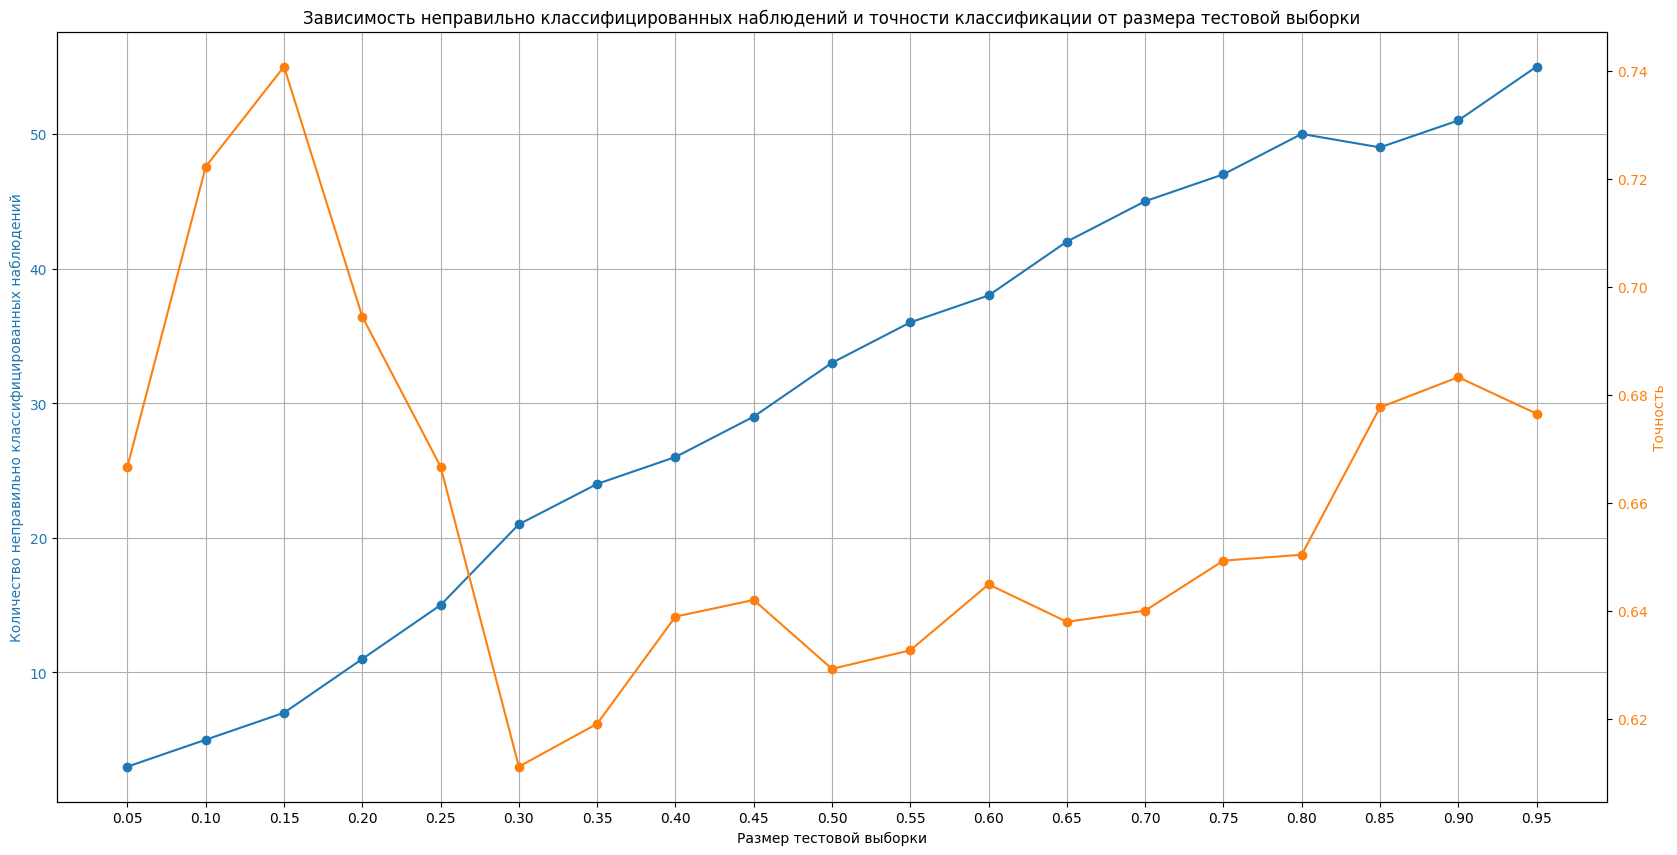

In [225]:
# Параметры для тестовой выборки
test_sizes = np.arange(0.05, 1.0, 0.05)
misclassified_counts = []
accuracies = []

# Цикл по размерам тестовой выборки
for test_size in test_sizes:
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=10)
    
    # Создание и обучение модели SVC
    model = SVC()
    model.fit(X_train, y_train)
    
    # Прогнозирование на тестовой выборке
    y_pred = model.predict(X_test)
    
    # Количество неправильно классифицированных точек
    misclassified_points = np.sum(y_pred != y_test)
    misclassified_counts.append(misclassified_points)
    
    # Вычисление точности классификации
    accuracy = model.score(X_test, y_test)
    accuracies.append(accuracy)

# Построение графиков
plt.figure(figsize=(20, 10))

# Создание оси для неправильно классифицированных наблюдений
ax1 = plt.gca()
ax1.set_xlabel('Размер тестовой выборки')
ax1.set_ylabel('Количество неправильно классифицированных наблюдений', color='tab:blue')
ax1.plot(test_sizes, misclassified_counts, marker='o', color='tab:blue', label='Неправильно классифицированные')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(test_sizes)

# Создание второй оси для точности классификации
ax2 = ax1.twinx()  
ax2.set_ylabel('Точность', color='tab:orange')  
ax2.plot(test_sizes, accuracies, marker='o', color='tab:orange', label='Точность')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Добавление заголовка и сетки
plt.title('Зависимость неправильно классифицированных наблюдений и точности классификации от размера тестовой выборки')
ax1.grid()

# Показать график
plt.show()

In [226]:
# На полученном графике видим две кривых, синяя показывает количество неправильно классифицированных наблюдений, оранжевая общую точность классификации. 
# В общем модель можно описать как "ниже среднего".
# Количество неправильных классификаций имеет тенденцию постоянного роста при увеличении тестовой выборки, что плохо.
# Точность имеет значительную нестабильность и в диапазоне 30-80% размера тестовой выборки находится около среднего значения в 63%, что сравнительно с остальными моделями - мало.

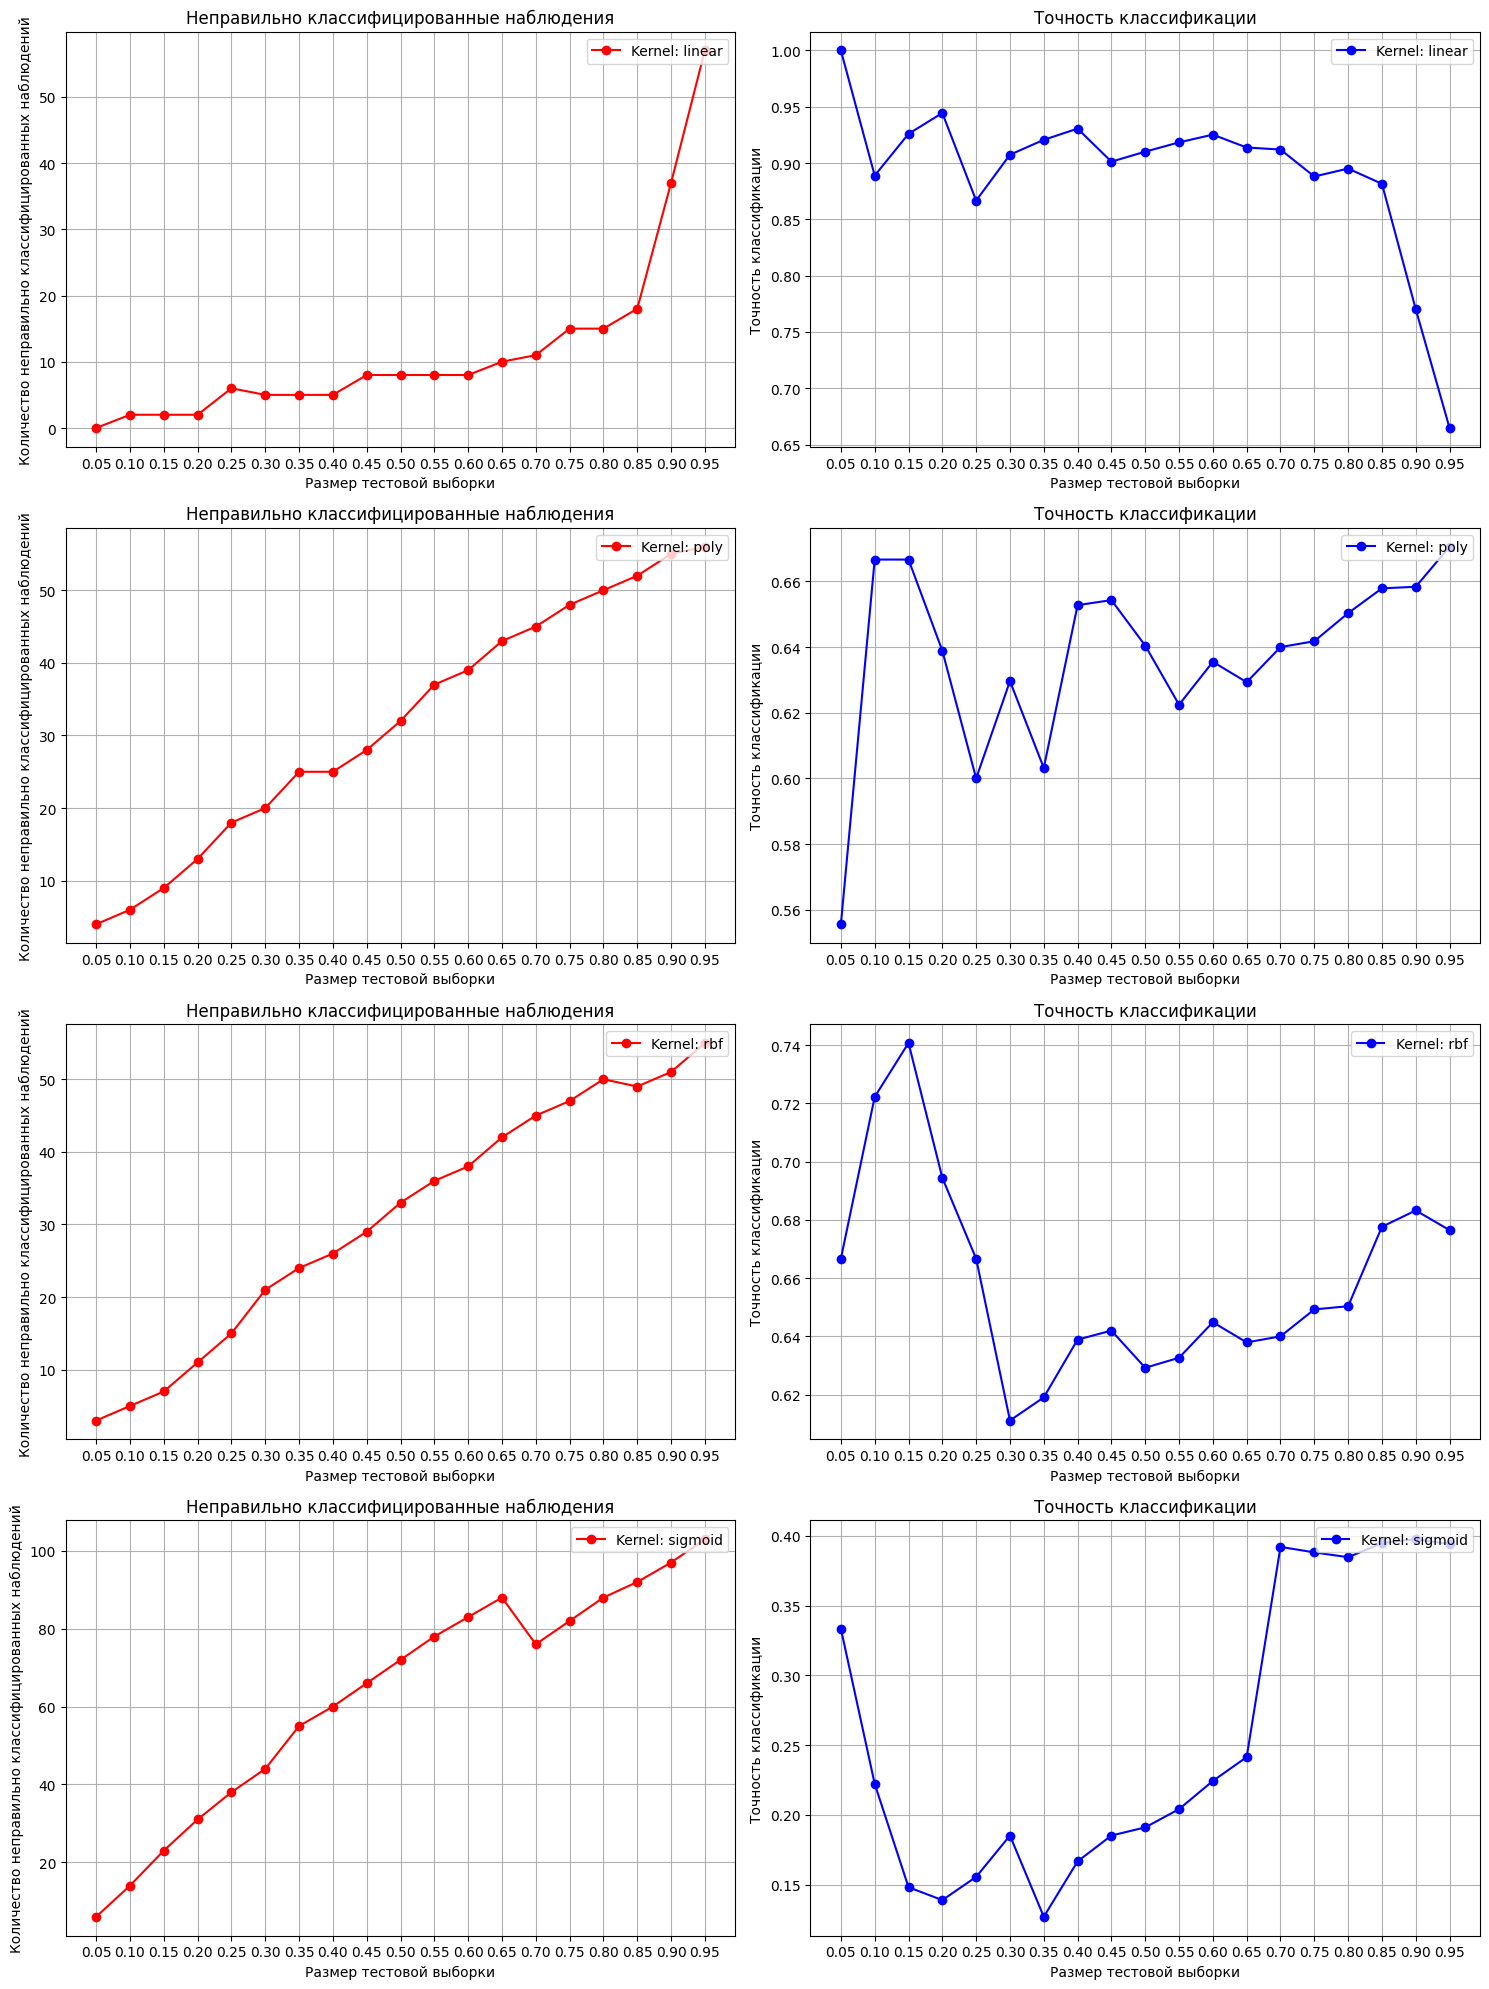

In [227]:
# Параметры для SVC
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Создание графиков
plt.figure(figsize=(15, 20))

# Индекс для подграфиков
index = 1

# Цикл по параметрам kernel
for kernel in kernels:
    misclassified_counts = []
    accuracies = []
    
    # Цикл по размерам тестовой выборки
    for test_size in test_sizes:
        # Разделение данных на обучающую и тестовую выборки
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=10)
        
        # Создание и обучение модели SVC
        model = SVC(kernel=kernel)
        model.fit(X_train, y_train)
        
        # Прогнозирование на тестовой выборке
        y_pred = model.predict(X_test)
        
        # Количество неправильно классифицированных точек
        misclassified_points = np.sum(y_pred != y_test)
        misclassified_counts.append(misclassified_points)
        
        # Вычисление точности классификации
        accuracy = model.score(X_test, y_test)
        accuracies.append(accuracy)

    # Построение графиков
    plt.subplot(len(kernels), 2, index)
    plt.plot(test_sizes, misclassified_counts, marker='o', label=f'Kernel: {kernel}', color='red')
    plt.title('Неправильно классифицированные наблюдения')
    plt.xlabel('Размер тестовой выборки')
    plt.ylabel('Количество неправильно классифицированных наблюдений')
    plt.xticks(test_sizes)
    plt.grid()
    plt.legend(loc='upper right')

    plt.subplot(len(kernels), 2, index + 1)
    plt.plot(test_sizes, accuracies, marker='o', label=f'Kernel: {kernel}', color='blue')
    plt.title('Точность классификации')
    plt.xlabel('Размер тестовой выборки')
    plt.ylabel('Точность классификации')
    plt.xticks(test_sizes)
    plt.grid()
    plt.legend(loc='upper right')

    index += 2

plt.tight_layout()
plt.show()

In [228]:
# Из полученных выше графиков можно чётко заметить разницу при использовании различных видов ядер метода, но самым лучшим показал себя параметр linear. 
# Он показал самые лучшие показатели точности и количества неправильных классификаций. На остальных итерациях явно заметна крайне нестабильная картина и сравнительно плохие показатели основных параметров.

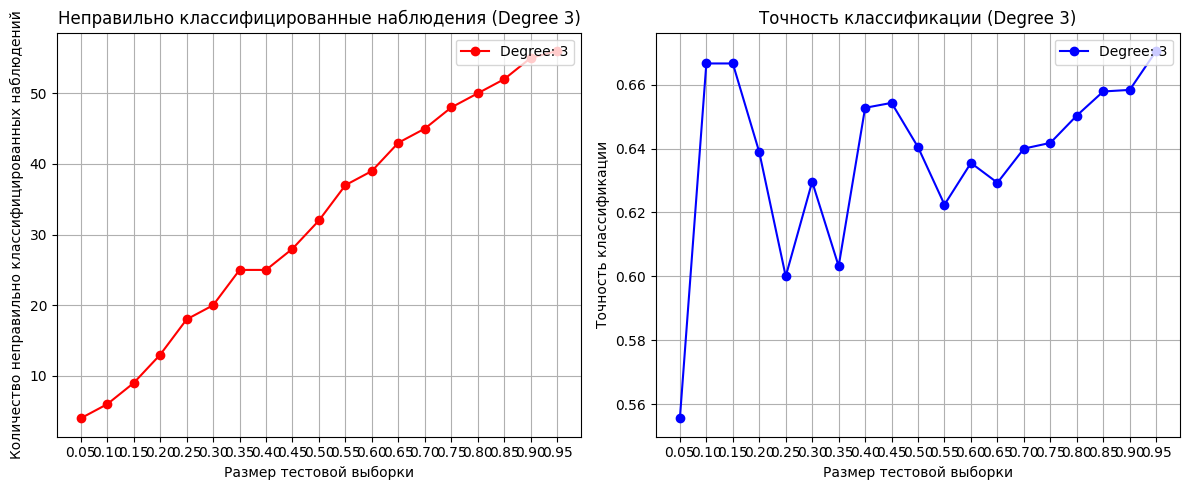

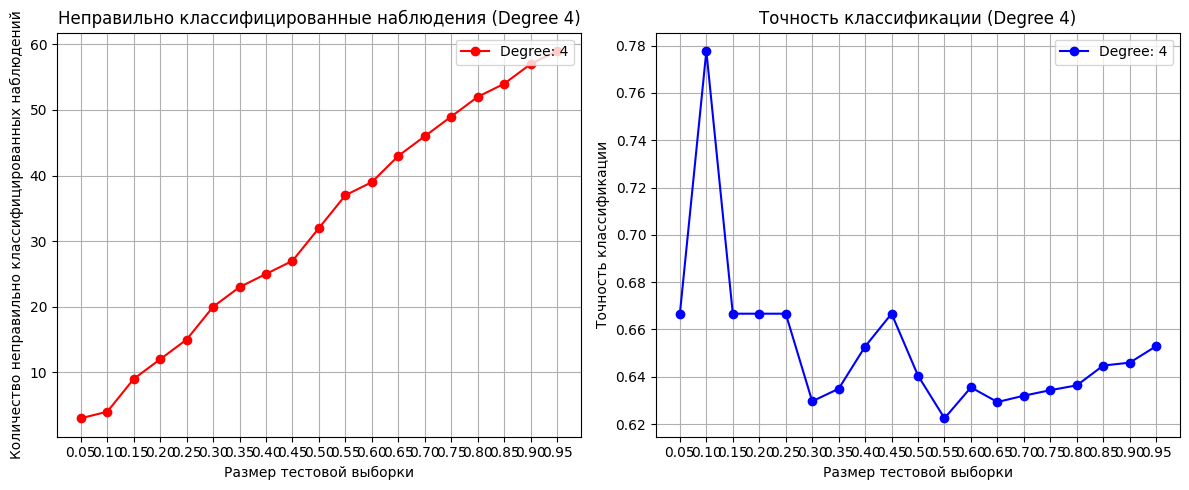

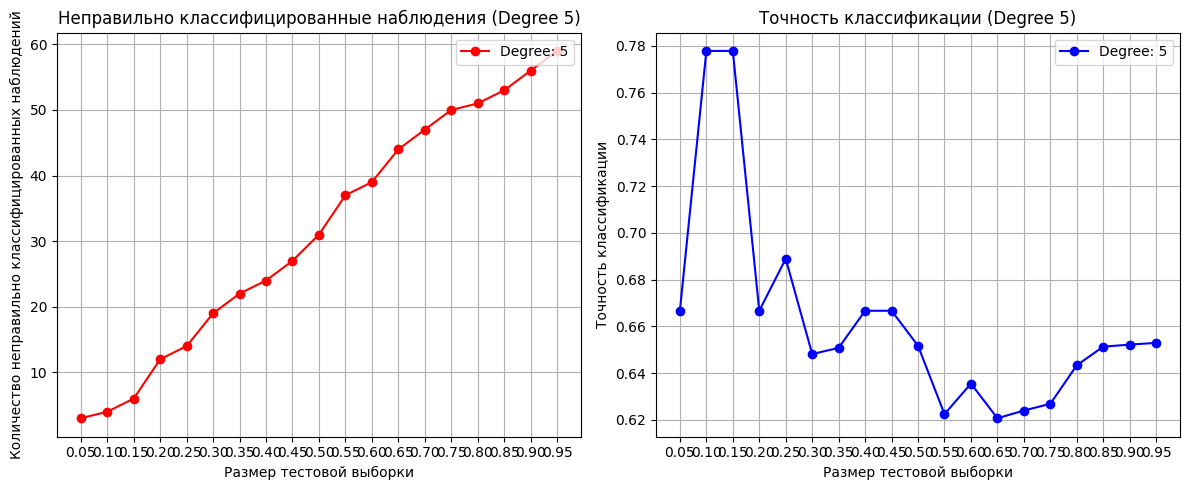

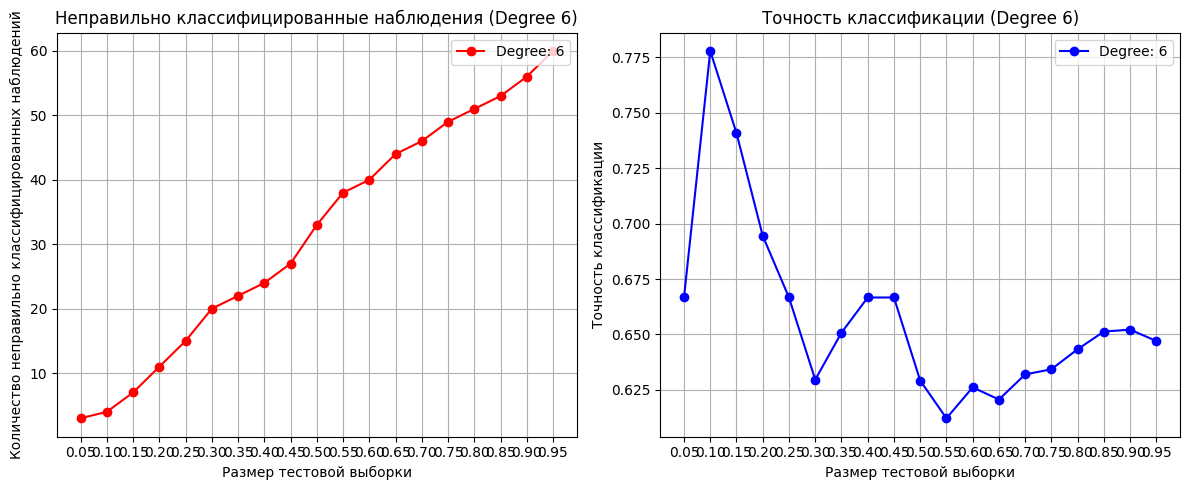

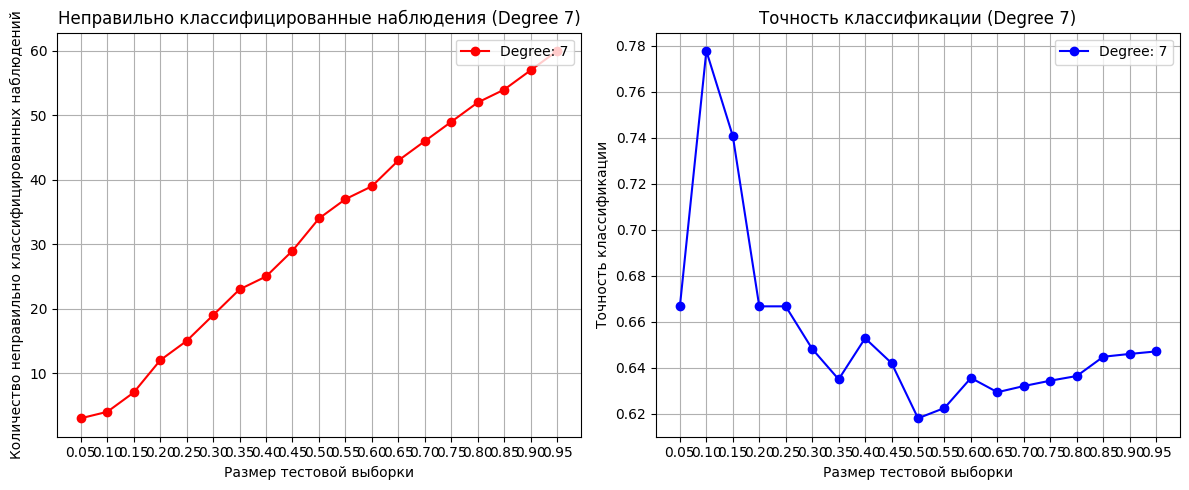

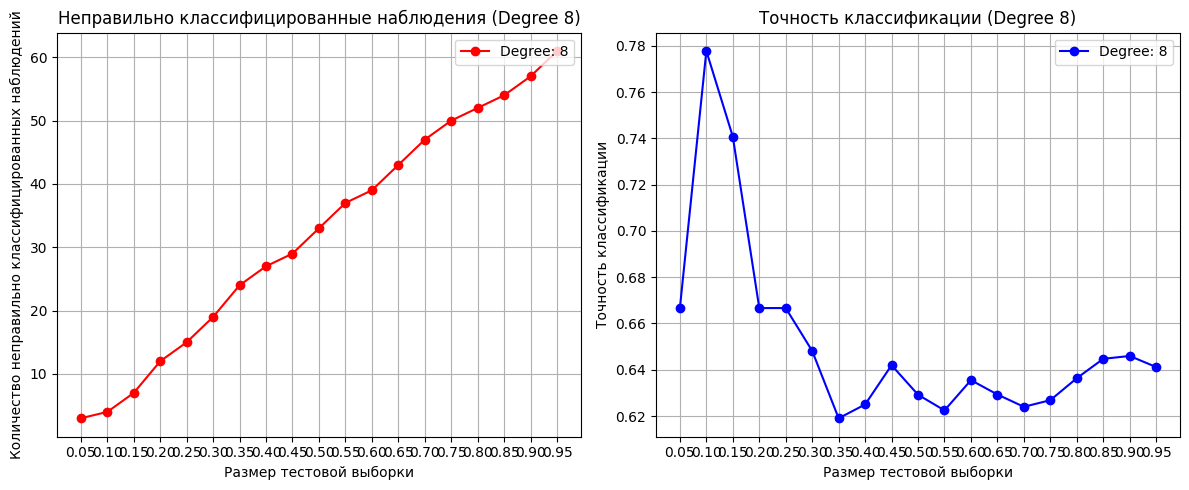

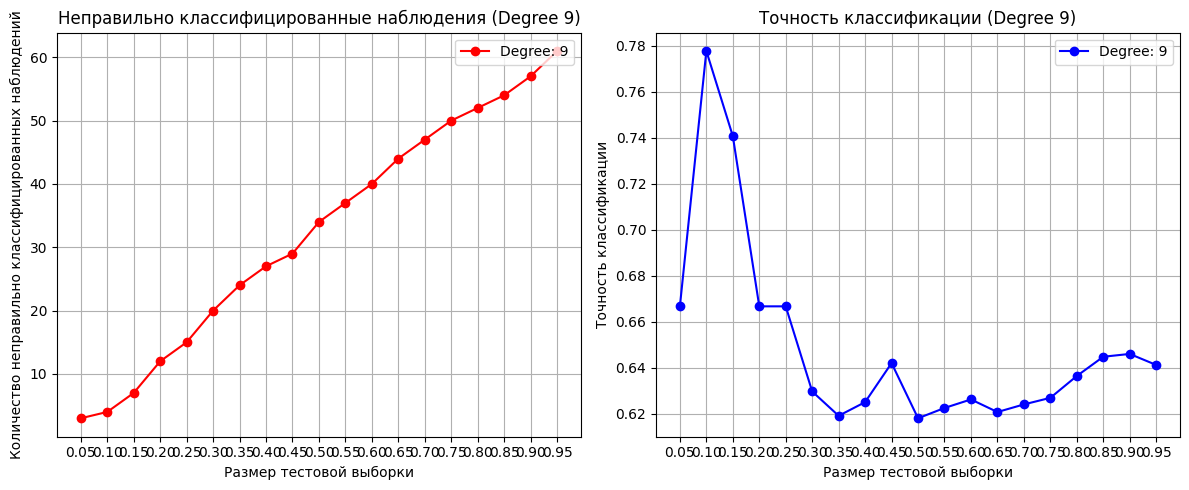

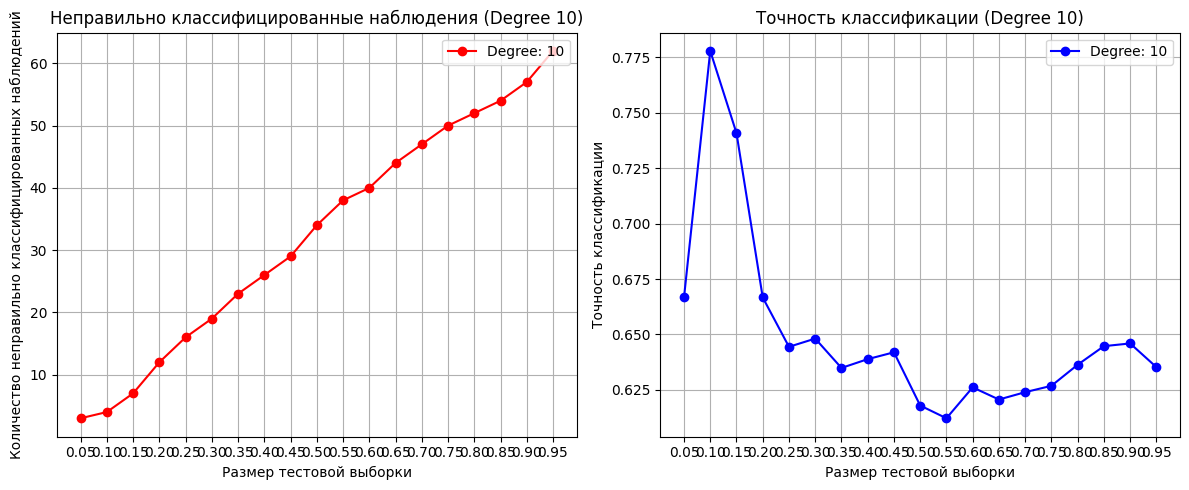

In [229]:
# Параметры для SVC
degrees = range(3, 11)  # от 3 до 10

# Цикл по параметрам degree
for degree in degrees:
    misclassified_counts = []
    accuracies = []
    
    # Цикл по размерам тестовой выборки
    for test_size in test_sizes:
        # Разделение данных на обучающую и тестовую выборки
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=10)
        
        # Создание и обучение модели SVC с полиномиальным ядром
        model = SVC(kernel='poly', degree=degree)
        model.fit(X_train, y_train)
        
        # Прогнозирование на тестовой выборке
        y_pred = model.predict(X_test)
        
        # Количество неправильно классифицированных точек
        misclassified_points = np.sum(y_pred != y_test)
        misclassified_counts.append(misclassified_points)
        
        # Вычисление точности классификации
        accuracy = model.score(X_test, y_test)
        accuracies.append(accuracy)

    # Построение графиков для текущего degree
    plt.figure(figsize=(12, 5))

    # График неправильно классифицированных наблюдений
    plt.subplot(1, 2, 1)
    plt.plot(test_sizes, misclassified_counts, marker='o', label=f'Degree: {degree}', color='red')
    plt.title(f'Неправильно классифицированные наблюдения (Degree {degree})')
    plt.xlabel('Размер тестовой выборки')
    plt.ylabel('Количество неправильно классифицированных наблюдений')
    plt.xticks(test_sizes)
    plt.grid()
    plt.legend(loc='upper right')

    # График точности классификации
    plt.subplot(1, 2, 2)
    plt.plot(test_sizes, accuracies, marker='o', label=f'Degree: {degree}', color='blue')
    plt.title(f'Точность классификации (Degree {degree})')
    plt.xlabel('Размер тестовой выборки')
    plt.ylabel('Точность классификации')
    plt.xticks(test_sizes)
    plt.grid()
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

In [230]:
# Как видно из графика, увеличение параметра Degree от 4 до 10 не сильно влияет на картину графиков. Отдельно стоит отметить Degree 3, где наибольшая точность на 10% ниже, чем в остальных случаях.

In [231]:
# Создание и обучение модели NuSVC
model = NuSVC()
model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Общее количество точек
total_points_nusvc = len(y_test)

# Количество неправильно маркированных точек
misclassified_points_nusvc = np.sum(y_pred != y_test)

# Вычисление точности классификации
accuracy_nusvc = model.score(X_test, y_test)

# Вывод результатов
print(f"Общее количество точек: {total_points_nusvc}")
print(f"Количество неправильно маркированных точек: {misclassified_points_nusvc}")
print(f"Точность классификации: {accuracy_nusvc:.2f}")

# Вывод информации о поддерживающих векторах
print("Поддерживающие векторы:")
print(model.support_vectors_)
print("Индексы поддерживающих векторов:")
print(model.support_)
print("Количество поддерживающих векторов для каждого класса:")
print(model.n_support_)

Общее количество точек: 170
Количество неправильно маркированных точек: 55
Точность классификации: 0.68
Поддерживающие векторы:
[[1.363e+01 1.810e+00 2.700e+00 1.720e+01 1.120e+02 2.850e+00 2.910e+00
  3.000e-01 1.460e+00 7.300e+00 1.280e+00 2.880e+00 1.310e+03]
 [1.386e+01 1.350e+00 2.270e+00 1.600e+01 9.800e+01 2.980e+00 3.150e+00
  2.200e-01 1.850e+00 7.220e+00 1.010e+00 3.550e+00 1.045e+03]
 [1.305e+01 5.800e+00 2.130e+00 2.150e+01 8.600e+01 2.620e+00 2.650e+00
  3.000e-01 2.010e+00 2.600e+00 7.300e-01 3.100e+00 3.800e+02]
 [1.141e+01 7.400e-01 2.500e+00 2.100e+01 8.800e+01 2.480e+00 2.010e+00
  4.200e-01 1.440e+00 3.080e+00 1.100e+00 2.310e+00 4.340e+02]
 [1.245e+01 3.030e+00 2.640e+00 2.700e+01 9.700e+01 1.900e+00 5.800e-01
  6.300e-01 1.140e+00 7.500e+00 6.700e-01 1.730e+00 8.800e+02]
 [1.384e+01 4.120e+00 2.380e+00 1.950e+01 8.900e+01 1.800e+00 8.300e-01
  4.800e-01 1.560e+00 9.010e+00 5.700e-01 1.640e+00 4.800e+02]]
Индексы поддерживающих векторов:
[5 7 2 3 0 1]
Количество под

In [232]:
# Создание и обучение модели LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Общее количество точек
total_points_lsvc = len(y_test)

# Количество неправильно маркированных точек
misclassified_points_lsvc = np.sum(y_pred != y_test)

# Вычисление точности классификации
accuracy_lsvc = model.score(X_test, y_test)

# Вывод результатов
print(f"Общее количество точек: {total_points_lsvc}")
print(f"Количество неправильно маркированных точек: {misclassified_points_lsvc}")
print(f"Точность классификации: {accuracy_lsvc:.2f}")

# Вывод информации о поддерживающих векторах (в модели LinearSVC отсутствуют данные параметры)
#print("Поддерживающие векторы:")
#print(model.support_vectors_)
#print("Индексы поддерживающих векторов:")
#print(model.support_)
#print("Количество поддерживающих векторов для каждого класса:")
#print(model.n_support_)

Общее количество точек: 170
Количество неправильно маркированных точек: 71
Точность классификации: 0.58


C:\Users\v-mar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [233]:
# Вывод результатов для удобного анализа. Пронаблюдаем разницу между количеством неправильных классификаций и точностью.

print('Модель SVC')
print(f"Общее количество точек: {total_points_svc}")
print(f"Количество неправильно маркированных точек: {misclassified_points_svc}")
print(f"Точность классификации: {accuracy_svc:.2f}")
print()
print('Модель NuSVC')
print(f"Общее количество точек: {total_points_nusvc}")
print(f"Количество неправильно маркированных точек: {misclassified_points_nusvc}")
print(f"Точность классификации: {accuracy_nusvc:.2f}")
print()
print('Модель LinearSVC')
print(f"Общее количество точек: {total_points_lsvc}")
print(f"Количество неправильно маркированных точек: {misclassified_points_lsvc}")
print(f"Точность классификации: {accuracy_lsvc:.2f}")

Модель SVC
Общее количество точек: 170
Количество неправильно маркированных точек: 55
Точность классификации: 0.68

Модель NuSVC
Общее количество точек: 170
Количество неправильно маркированных точек: 55
Точность классификации: 0.68

Модель LinearSVC
Общее количество точек: 170
Количество неправильно маркированных точек: 71
Точность классификации: 0.58


In [234]:
# Исходя из полученных результатов, делаем вывод что модели SVC и NuSVC сработали одинаково.
# В свою очередь, модель LinearSVC показала сравнительно худшие результаты.

In [235]:
#
# 1. SVC (Support Vector Classification)
#     Общее описание: Это наиболее универсальная реализация SVM, которая поддерживает различные ядра (kernel), такие как линейное, полиномиальное, радиальное базисное (RBF) и сигмоидальное.
#     Параметры:
#         C: Параметр регуляризации, который контролирует компромисс между максимизацией ширины разделяющей полосы и минимизацией ошибки классификации.
#         kernel: Определяет тип ядра, используемого для преобразования данных.
#     Подходит для: Задач, где требуется гибкость в выборе ядра, и когда данные не являются линейно разделимыми.
# 2. NuSVC (Nu Support Vector Classification)
#     Общее описание: Это аналог SVC, но с другим подходом к параметрам регуляризации. Вместо параметра C, который контролирует штраф за ошибки, NuSVC использует параметр nu, который задает верхнюю границу на долю ошибок и нижнюю границу на долю поддерживающих векторов.
#     Параметры:
#         nu: Параметр, который контролирует долю неправильно классифицированных примеров и долю поддерживающих векторов.
#         kernel: Как и в SVC, поддерживает различные ядра.
#     Подходит для: Задач, где важно контролировать долю ошибок и поддерживающих векторов, что может быть полезно в некоторых сценариях.
# 3. LinearSVC (Linear Support Vector Classification)
#     Общее описание: Это специализированная версия SVM, которая использует только линейное ядро. Она оптимизирована для работы с линейно разделимыми данными и может быть более эффективной по времени и памяти по сравнению с SVC и NuSVC, когда данные действительно линейно разделимы.
#     Параметры:
#         C: Параметр регуляризации, аналогичный SVC.
#         max_iter: Максимальное количество итераций для оптимизации.
#     Подходит для: Задач, где данные линейно разделимы, и требуется высокая производительность.
# Основные отличия:
#     Тип ядра: SVC и NuSVC могут использовать различные ядра, в то время как LinearSVC использует только линейное ядро.
#     Параметры регуляризации: SVC и LinearSVC используют параметр C, тогда как NuSVC использует параметр nu, который имеет другой смысл.
#     Производительность: LinearSVC может быть более эффективным для линейно разделимых данных, в то время как SVC и NuSVC могут быть более гибкими для сложных, нелинейных задач.